In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/sample_data/US_Accidents_Dec21_updated.csv')

<ipython-input-11-d40e956a0ca4>:1: DtypeWarning: Columns (35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/US_Accidents_Dec21_updated.csv')


In [12]:
df.shape

(68238, 47)

In [6]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68238 entries, 0 to 68237
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     68238 non-null  object 
 1   Severity               68238 non-null  int64  
 2   Start_Time             68238 non-null  object 
 3   End_Time               68238 non-null  object 
 4   Start_Lat              68238 non-null  float64
 5   Start_Lng              68238 non-null  float64
 6   End_Lat                68238 non-null  float64
 7   End_Lng                68238 non-null  float64
 8   Distance(mi)           68238 non-null  float64
 9   Description            68238 non-null  object 
 10  Number                 13735 non-null  float64
 11  Street                 68238 non-null  object 
 12  Side                   68238 non-null  object 
 13  City                   68230 non-null  object 
 14  County                 68238 non-null  object 
 15  St

In [8]:
cities_by_accidents = df['City'].value_counts()
cities_by_accidents

Houston               3268
Dallas                2989
Charlotte             1789
Chicago               1256
Minneapolis           1144
                      ... 
Colonial Beach           1
Lewiston Woodville       1
Oak City                 1
Youngsville              1
Bitely                   1
Name: City, Length: 4570, dtype: int64

In [10]:
states_by_accidents = df['State'].value_counts()[0:5] # Top 5 States with most number of accidents
states_by_accidents

CA    10792
TX    10555
FL     6017
IL     4872
NY     3031
Name: State, dtype: int64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

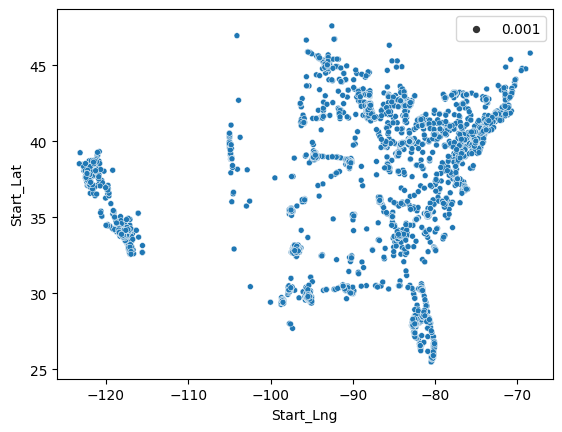

In [13]:
sample_df = df.sample(int(0.1 * len(df)))

sns.scatterplot(data=sample_df, x='Start_Lng', y='Start_Lat',size=0.001)

In [22]:
import folium
from folium.plugins import HeatMap

map = folium.Map()
HeatMap(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))).add_to(map)
map.fit_bounds([[sample_df.Start_Lat.min(), sample_df.Start_Lng.min()], [sample_df.Start_Lat.max(), sample_df.Start_Lng.max()]])

map